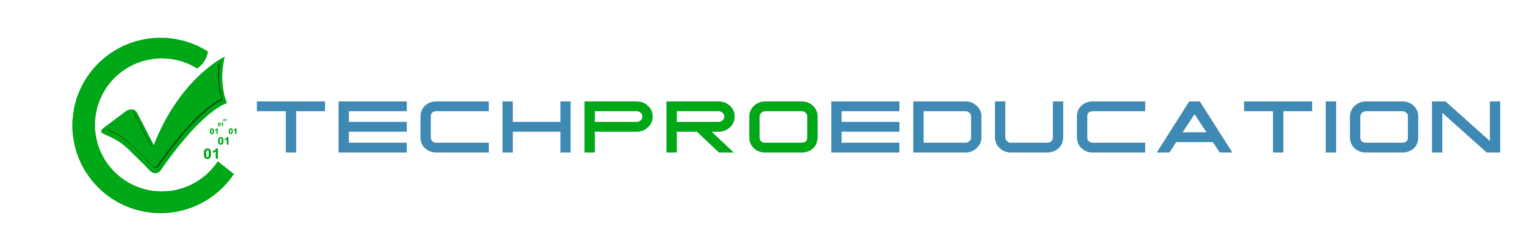

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv("adult.csv") 

In [3]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(32537, 15)

In [9]:
df.describe().T

count           mean            std      min       25%  \
age             32537.0      38.585549      13.637984     17.0      28.0   
fnlwgt          32537.0  189780.848511  105556.471009  12285.0  117827.0   
education.num   32537.0      10.081815       2.571633      1.0       9.0   
capital.gain    32537.0    1078.443741    7387.957424      0.0       0.0   
capital.loss    32537.0      87.368227     403.101833      0.0       0.0   
hours.per.week  32537.0      40.440329      12.346889      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  236993.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [10]:
df.describe(include="object").T

count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital.status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    32537      6             Husband  13187
race            32537      5               White  27795
sex             32537      2                Male  21775
native.country  32537     42       United-States  29153
income          32537      2               <=50K  24698

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
object_col=df.loc[:, df.dtypes == object].columns
object_col

for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital.status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


In [13]:
print((df.astype(str) == '?').any())

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool


In [14]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [15]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [16]:
missing_values(df)

Missing_Number  Missing_Percent
occupation                1843         0.056643
workclass                 1836         0.056428
native.country             582         0.017887

## Missing Value Control

## workclass

In [17]:
df.workclass.value_counts(dropna = False)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
df['workclass'] = df['workclass'].fillna('Private')

In [19]:
missing_values(df)

Missing_Number  Missing_Percent
occupation                1843         0.056643
native.country             582         0.017887

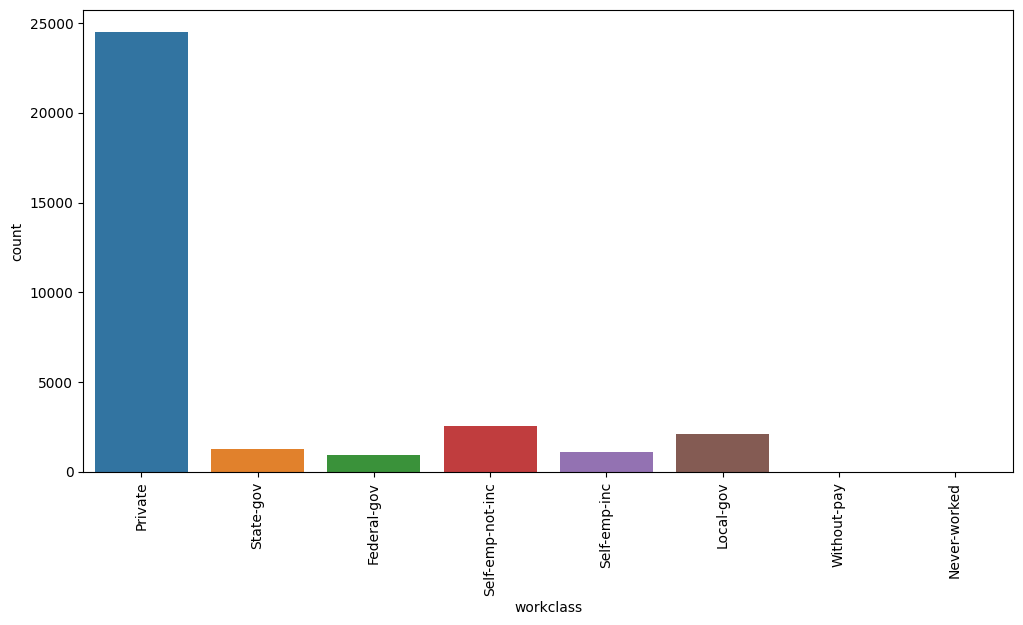

In [20]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(x="workclass",data=df)
ax.set_xticklabels(df.workclass.unique(),rotation=90);

## occupation

In [21]:
df['occupation'].value_counts(dropna = False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

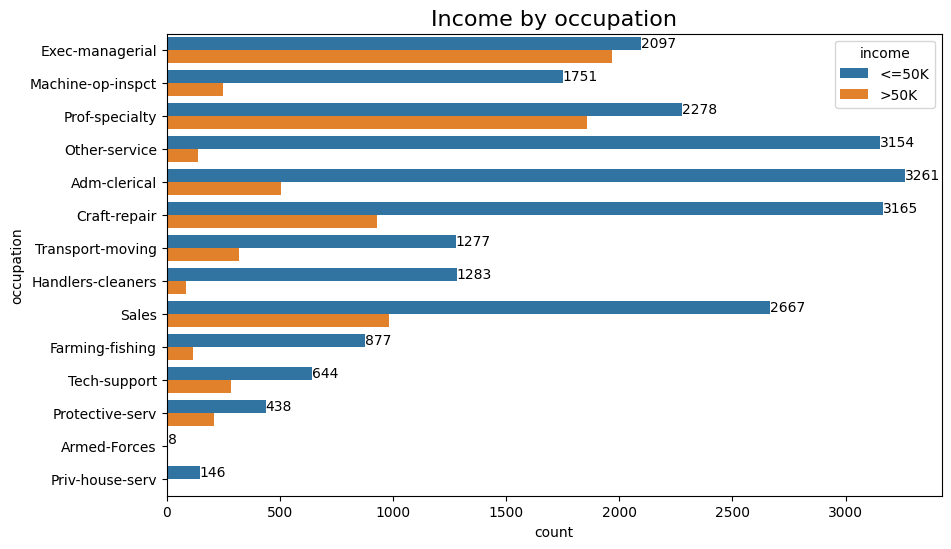

In [22]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['occupation'], hue = df['income'])
plt.title("Income by occupation", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [23]:
df['occupation'] = df['occupation'].fillna(method='bfill')

In [24]:
missing_values(df)

Missing_Number  Missing_Percent
native.country             582         0.017887

## native country

In [25]:
df['native.country'].value_counts(dropna = False)

United-States                 29153
Mexico                          639
NaN                             582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [26]:
df['native.country'] = df['native.country'].fillna('United-States')

In [27]:
missing_values(df)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [28]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [29]:
df['native.country'].apply(mapping_native_country).value_counts()

US        29735
Others     2802
Name: native.country, dtype: int64

In [30]:
["US" if i == "United-States" else "Others" for i in df['native.country']]

['US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'Others',
 'Others',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'Others',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'Others',
 'US',
 'US',
 'US',
 'Others',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'Others',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'Others',
 'US',
 'US',
 'US',
 'US',
 'Others',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 '

In [31]:
df["native_country_summary"] = df['native.country'].apply(mapping_native_country)

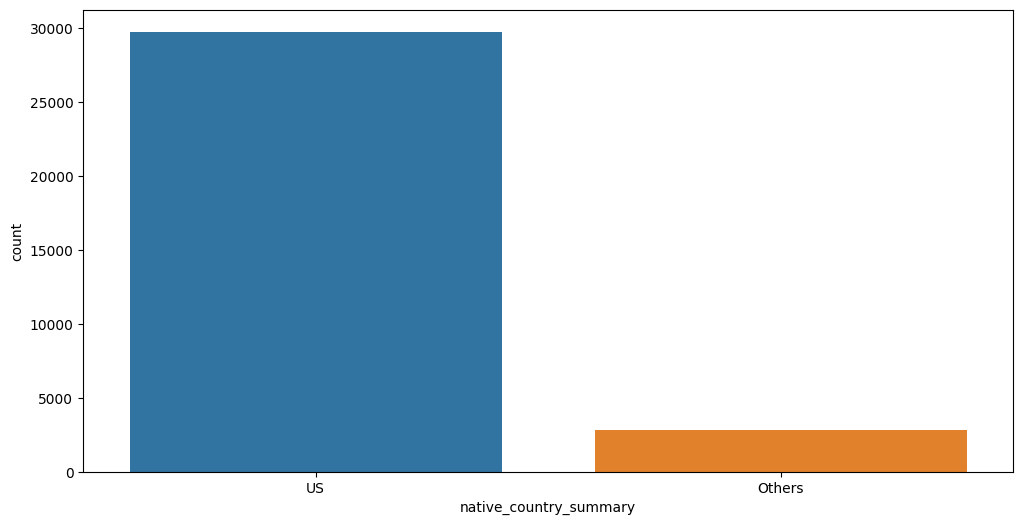

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x="native_country_summary",data=df);

In [33]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0    Exec-managerial  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2  Machine-op-inspct      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income native_country_summary  
0          4356              40  United-States  <=50K                     US  
1          4356              18  United-States  <=50K                     US  
2          4356              40  United-States  <=50K                     US  
3          3900              40  United-States  <=50K                     US  
4          3900              40  United-States  <=50K                     US

## Target Variable - Income

In [34]:
df.income.value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

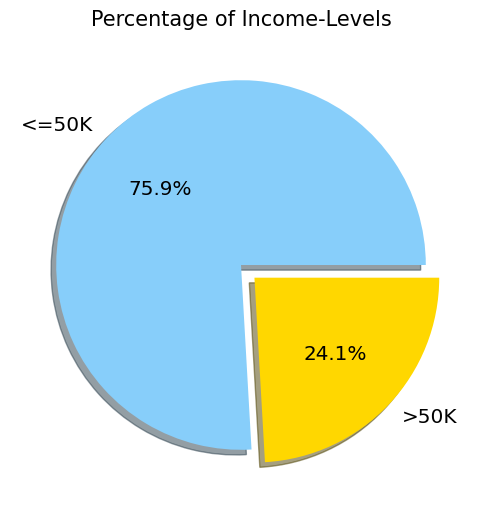

In [35]:
Percentage_income = df.income.value_counts()/len(df)
Percentage_income

plt.figure(figsize=(12,6))

plt.pie(Percentage_income,
        labels=["<=50K",">50K"],
        autopct="%.1f%%",
        explode=[0,0.1],
        colors=["lightskyblue","gold"],
        textprops=({'size': 'x-large'}),
        shadow=True);
plt.title("Percentage of Income-Levels",fontsize=15);

In [36]:
df.income= df.income.map({"<=50K":0,">50K":1})
df.income

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

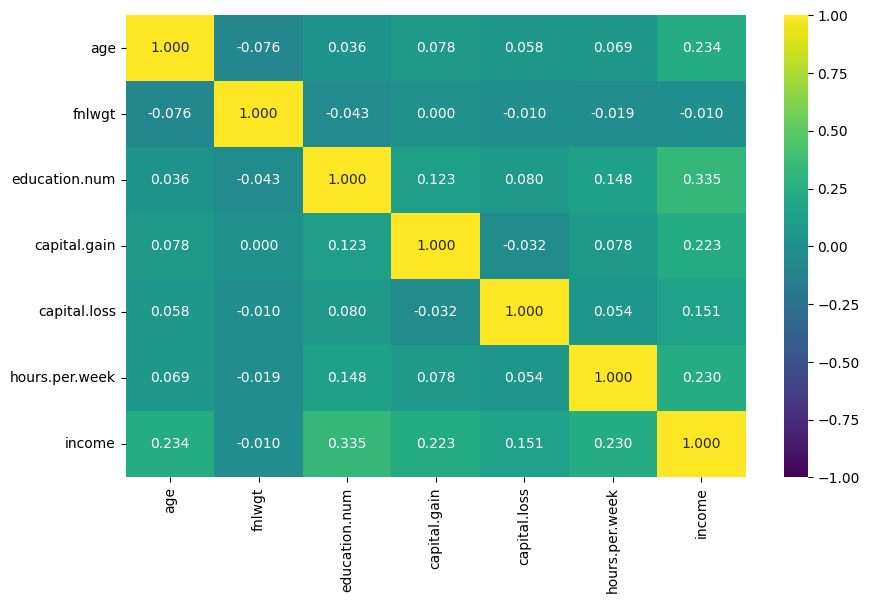

In [37]:
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='viridis');

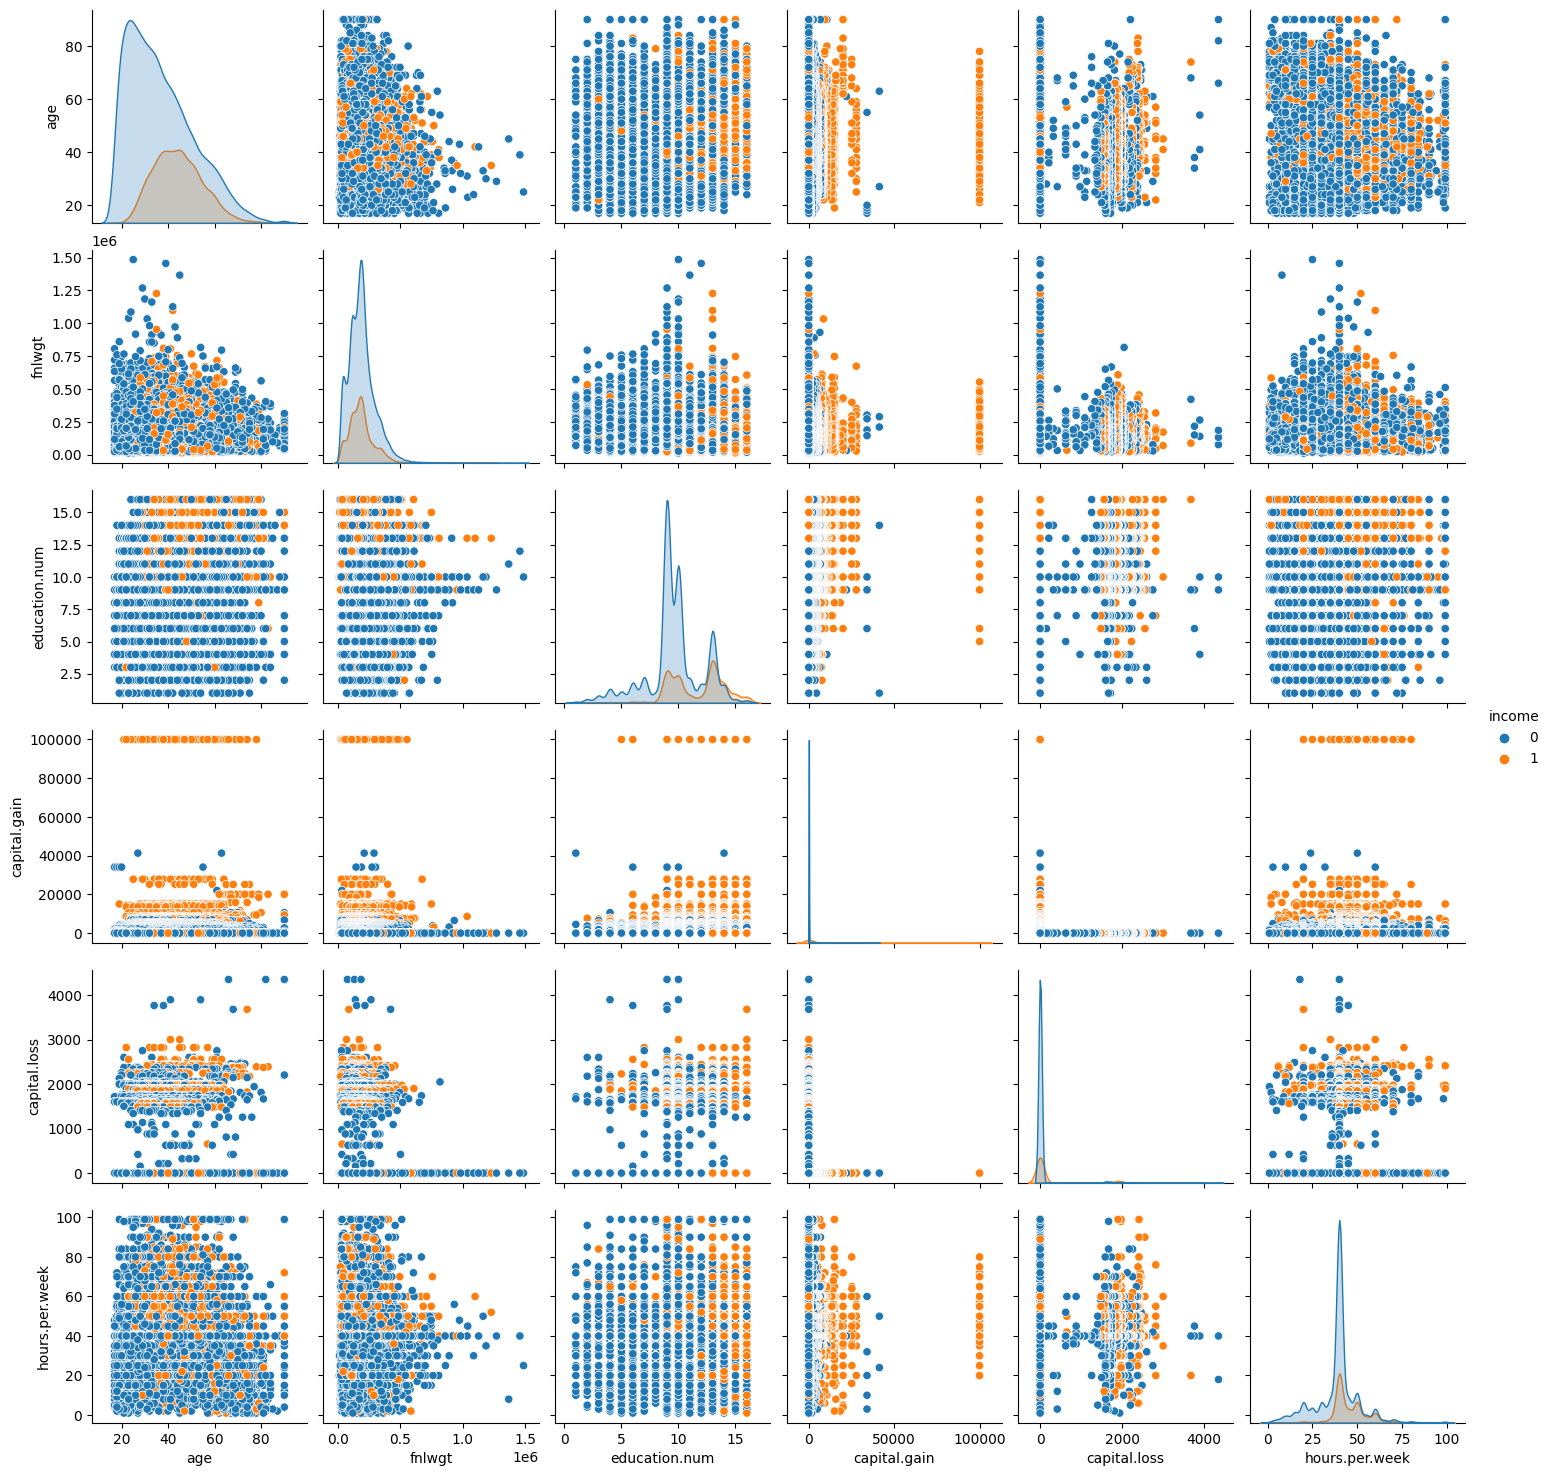

In [38]:
sns.pairplot(df, hue = "income");

## Marital Status

In [39]:
df['marital.status'].value_counts(dropna=False)

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

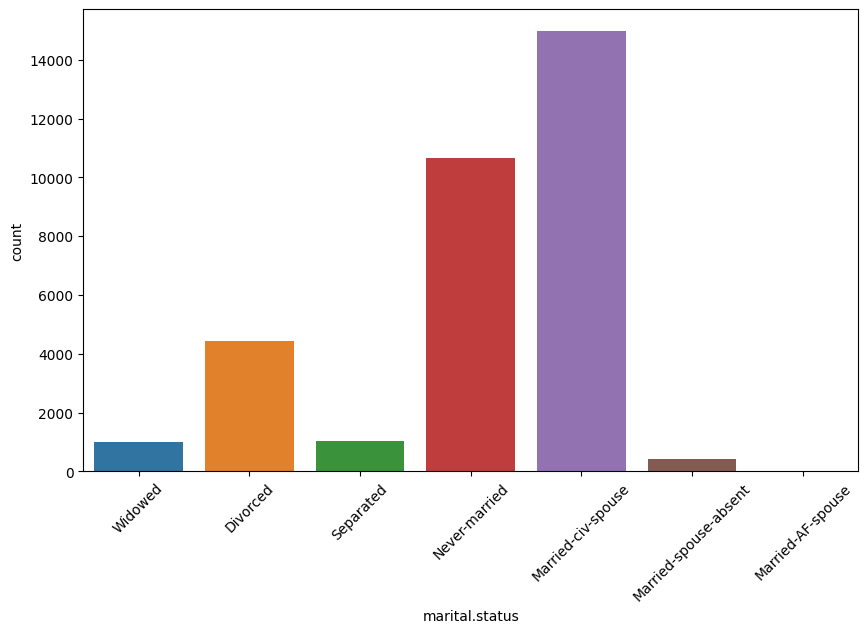

In [40]:
fig,ax = plt.subplots()

sns.countplot(x="marital.status",data=df);

ax.set_xticklabels(df['marital.status'].unique(),rotation=45);

In [41]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [42]:
df['marital.status'].apply(mapping_marital_status).value_counts()

unmarried    17126
married      15411
Name: marital.status, dtype: int64

In [43]:
df["marital_status_summary"] = df['marital.status'].apply(mapping_marital_status)
df.head(2)

age workclass  fnlwgt education  education.num marital.status  \
0   90   Private   77053   HS-grad              9        Widowed   
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0  Exec-managerial  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country  income native_country_summary  \
0              40  United-States       0                     US   
1              18  United-States       0                     US   

  marital_status_summary  
0              unmarried  
1              unmarried

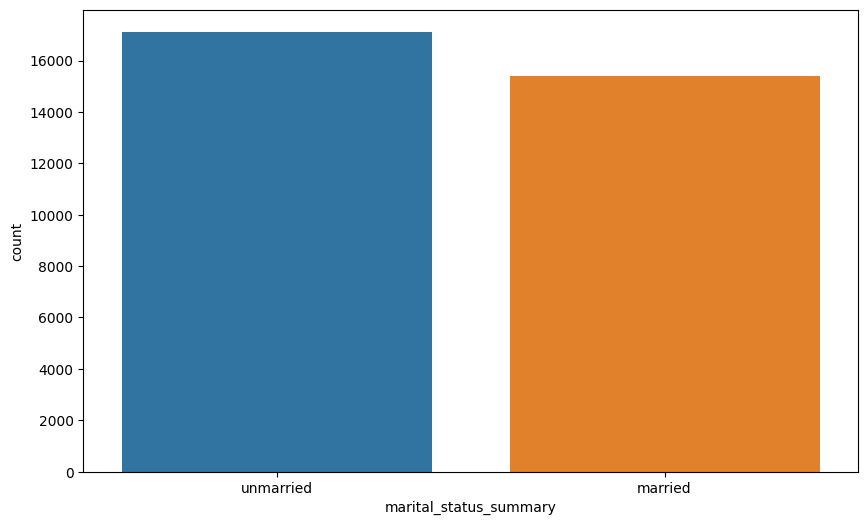

In [44]:
fig,ax = plt.subplots()
sns.countplot(x="marital_status_summary",data=df);

## Education

In [45]:
df.education.value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

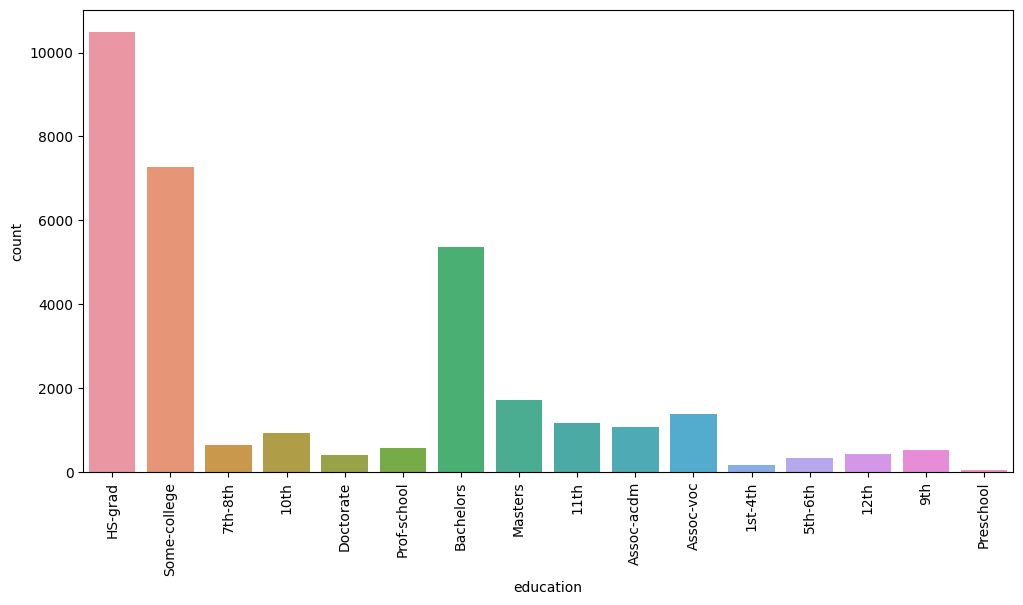

In [46]:
fig,ax = plt.subplots(figsize=(12,6))

sns.countplot(x="education",data=df)

ax.set_xticklabels(df.education.unique(), rotation=90);

In [47]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [48]:
df.education.apply(mapping_education).value_counts()

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [49]:
df["education_summary"] = df.education.apply(mapping_education)
df.head(2)

age workclass  fnlwgt education  education.num marital.status  \
0   90   Private   77053   HS-grad              9        Widowed   
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0  Exec-managerial  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country  income native_country_summary  \
0              40  United-States       0                     US   
1              18  United-States       0                     US   

  marital_status_summary   education_summary  
0              unmarried  medium_level_grade  
1              unmarried  medium_level_grade

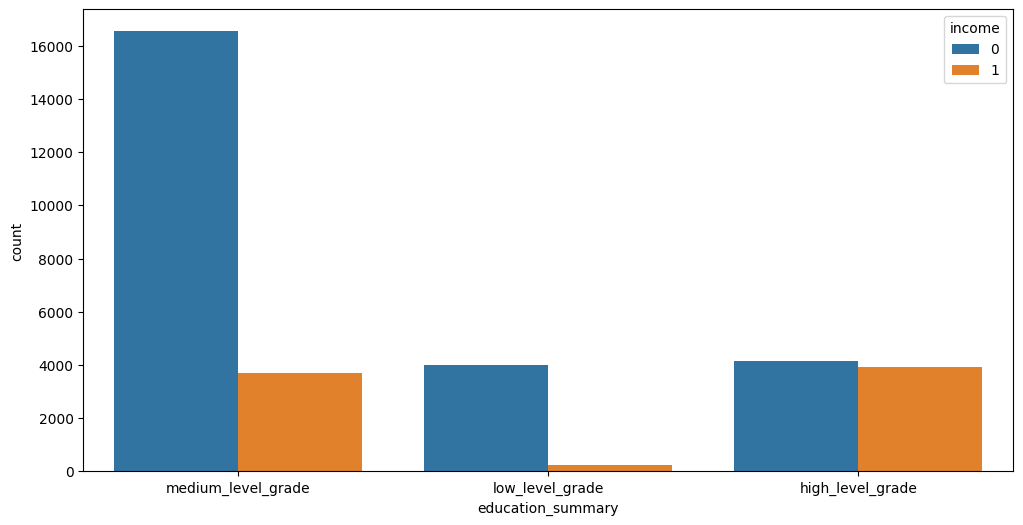

In [50]:
plt.figure(figsize=(12,6))

sns.countplot(x="education_summary",data=df,hue="income");

## Age 

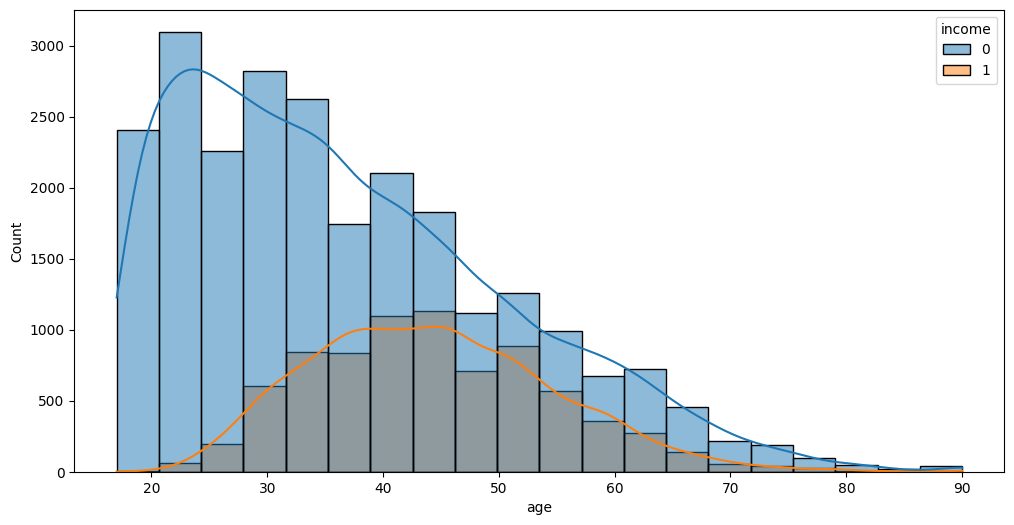

In [51]:
plt.figure(figsize=(12,6))

sns.histplot(x="age",data=df,bins=20,kde=True,hue="income");

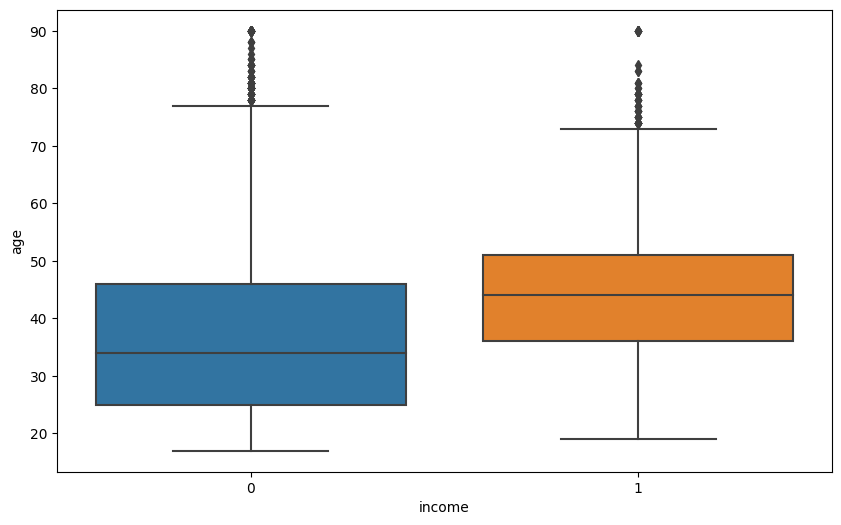

In [52]:
sns.boxplot(data=df,y="age",x='income');

In [53]:
age_17_to_80 =df.loc[(df.age > 80)| (df.age < 17)].sort_values("age",ascending=False)
age_17_to_80

age  workclass  fnlwgt  education  education.num      marital.status  \
0       90    Private   77053    HS-grad              9             Widowed   
21192   90    Private   84553    HS-grad              9  Married-civ-spouse   
17603   90    Private   90523    HS-grad              9             Widowed   
7756    90    Private  313986       11th              7       Never-married   
8791    90    Private  141758        9th              5       Never-married   
...    ...        ...     ...        ...            ...                 ...   
20806   81  State-gov  132204    1st-4th              2             Widowed   
15379   81    Private  201398    Masters             14             Widowed   
15789   81    Private  100675    1st-4th              2  Married-civ-spouse   
18833   81    Private   89015    HS-grad              9  Married-civ-spouse   
32528   81    Private  120478  Assoc-voc             11            Divorced   

              occupation   relationship   race     sex  capital.gain  \
0        Exec-managerial  Not-in-family  White  Female             0   
21192  Machine-op-inspct        Husband  White    Male             0   
17603   Transport-moving      Unmarried  White    Male             0   
7756   Handlers-cleaners      Own-child  White    Male             0   
8791        Adm-clerical  Not-in-family  White  Female             0   
...                  ...            ...    ...     ...           ...   
20806      Other-service  Not-in-family  White  Female             0   
15379     Prof-specialty      Unmarried  White    Male             0   
15789     Prof-specialty        Husband  White    Male             0   
18833    Exec-managerial        Husband  White    Male             0   
32528   Transport-moving      Unmarried  White  Female             0   

       capital.loss  hours.per.week native.country  income  \
0              4356              40  United-States       0   
21192             0              40  United-States       0   
17603             0              99  United-States       0   
7756              0              40  United-States       0   
8791              0              40  United-States       0   
...             ...             ...            ...     ...   
20806             0              20  United-States       0   
15379             0              60  United-States       0   
15789             0              15         Poland       0   
18833             0              18  United-States       0   
32528             0               1  United-States       0   

      native_country_summary marital_status_summary   education_summary  
0                         US              unmarried  medium_level_grade  
21192                     US                married  medium_level_grade  
17603                     US              unmarried  medium_level_grade  
7756                      US              unmarried     low_level_grade  
8791                      US              unmarried     low_level_grade  
...                      ...                    ...                 ...  
20806                     US              unmarried     low_level_grade  
15379                     US              unmarried    high_level_grade  
15789                 Others                married     low_level_grade  
18833                     US                married  medium_level_grade  
32528                     US              unmarried  medium_level_grade  

[98 rows x 18 columns]

In [54]:
age_17_to_80.shape

(98, 18)

In [55]:
df.drop(age_17_to_80.index,inplace=True)

## Hours Per Week

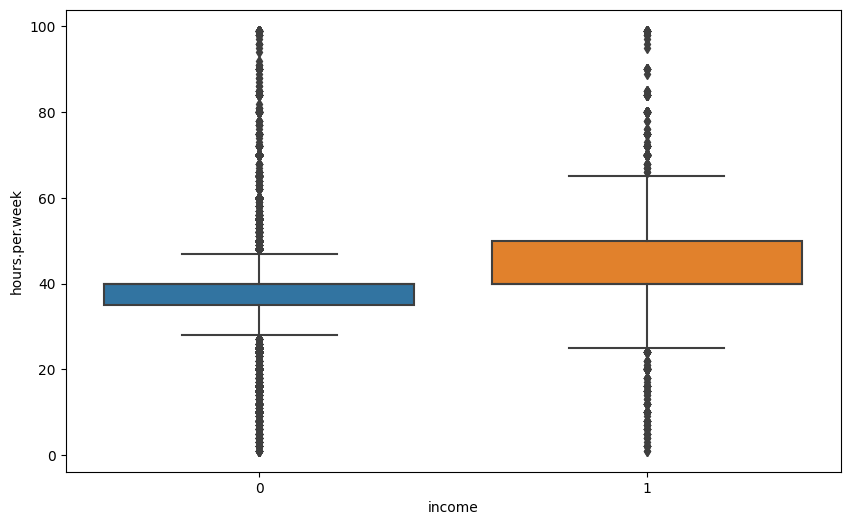

In [56]:
sns.boxplot(data=df,y="hours.per.week",x='income');

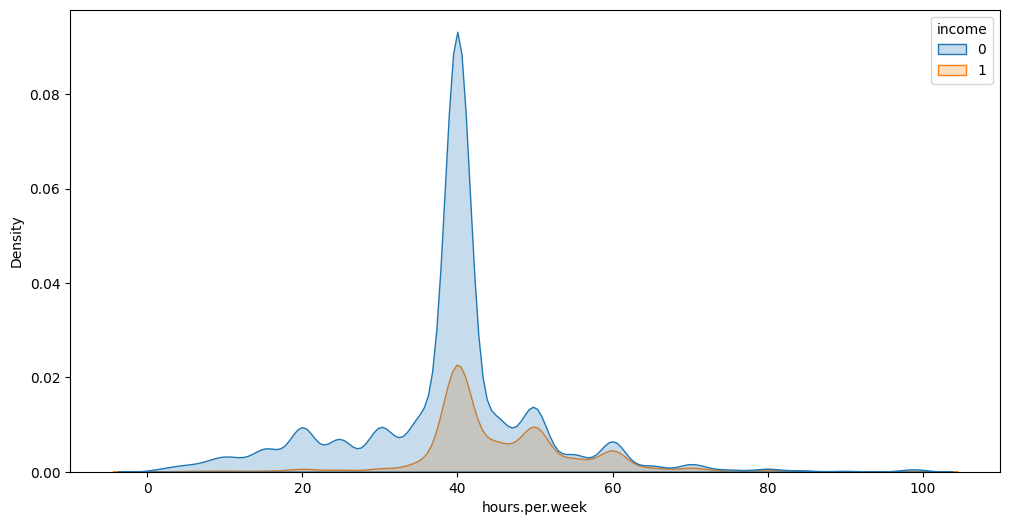

In [57]:
plt.figure(figsize=(12,6))

sns.kdeplot(x="hours.per.week",data=df,shade=True,hue="income");

In [58]:
hpw_7_to_70=df.loc[(df["hours.per.week"] > 70)  | (df["hours.per.week"] < 7)].sort_values(by="hours.per.week",ascending=False)
hpw_7_to_70

age  workclass  fnlwgt     education  education.num  \
32534   30    Private   33811     Bachelors             13   
3346    43  Local-gov  118853  Some-college             10   
17696   37    Private  241174     Bachelors             13   
17761   29    Private  167716       HS-grad              9   
3939    44    Private   83508   Prof-school             15   
...    ...        ...     ...           ...            ...   
21422   23    Private   72887       HS-grad              9   
21709   65    Private   76043       HS-grad              9   
9272    76    Private  211574          10th              6   
14186   27    Private  147951       HS-grad              9   
26067   74    Private  260669          10th              6   

           marital.status         occupation    relationship  \
32534       Never-married     Prof-specialty   Not-in-family   
3346   Married-civ-spouse       Tech-support         Husband   
17696  Married-civ-spouse     Prof-specialty         Husband   
17761            Divorced      Other-service       Unmarried   
3939             Divorced     Prof-specialty   Not-in-family   
...                   ...                ...             ...   
21422       Never-married       Craft-repair       Own-child   
21709  Married-civ-spouse    Exec-managerial         Husband   
9272   Married-civ-spouse              Sales         Husband   
14186       Never-married  Machine-op-inspct  Other-relative   
26067            Divorced      Other-service   Not-in-family   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
32534  Asian-Pac-Islander  Female             0             0              99   
3346                White    Male          4386             0              99   
17696               White    Male             0             0              99   
17761               White  Female             0             0              99   
3939                White  Female          2354             0              99   
...                   ...     ...           ...           ...             ...   
21422  Asian-Pac-Islander    Male             0             0               1   
21709               White    Male             0             0               1   
9272                White    Male             0             0               1   
14186               White    Male             0             0               1   
26067               White  Female             0             0               1   

      native.country  income native_country_summary marital_status_summary  \
32534  United-States       0                     US              unmarried   
3346   United-States       1                     US                married   
17696  United-States       1                     US                married   
17761  United-States       0                     US              unmarried   
3939   United-States       0                     US              unmarried   
...              ...     ...                    ...                    ...   
21422        Vietnam       0                 Others              unmarried   
21709  United-States       1                     US                married   
9272   United-States       0                     US                married   
14186  United-States       0                     US              unmarried   
26067  United-States       0                     US              unmarried   

        education_summary  
32534    high_level_grade  
3346   medium_level_grade  
17696    high_level_grade  
17761  medium_level_grade  
3939     high_level_grade  
...                   ...  
21422  medium_level_grade  
21709  medium_level_grade  
9272      low_level_grade  
14186  medium_level_grade  
26067     low_level_grade  

[753 rows x 18 columns]

In [59]:
hpw_7_to_70.shape

(753, 18)

In [60]:
df.drop(hpw_7_to_70.index,inplace=True)

In [61]:
ageupper60_hpwupper60=df.loc[(df.age > 60)&(df["hours.per.week"]  > 60)]
ageupper60_hpwupper60

age         workclass  fnlwgt     education  education.num  \
141     65      Self-emp-inc   81413       HS-grad              9   
986     67           Private  197816  Some-college             10   
1195    62           Private  162245   Prof-school             15   
1664    65      Self-emp-inc  210381     Bachelors             13   
3852    70  Self-emp-not-inc  139889  Some-college             10   
6089    75           Private  101887          10th              6   
6117    63      Self-emp-inc   54052       Masters             14   
6530    70           Private   94692     Bachelors             13   
10160   68           Private  284763          11th              7   
11248   61  Self-emp-not-inc  133969       HS-grad              9   
12622   62  Self-emp-not-inc   26911       7th-8th              4   
15197   63      Self-emp-inc  110890       Masters             14   
18717   62  Self-emp-not-inc  115176       HS-grad              9   
21275   64  Self-emp-not-inc  192695       5th-6th              3   
21754   62           Private  252668       Masters             14   
22138   68           Private  351402     Doctorate             16   
23059   71           Private   45801       HS-grad              9   
24623   63  Self-emp-not-inc   28612       HS-grad              9   
24788   64           Private  212838       HS-grad              9   
25918   61           Private  191417           9th              5   
26773   66      Self-emp-inc  179951     Bachelors             13   
27407   67  Self-emp-not-inc  152102       HS-grad              9   
28165   65           Private  197883          10th              6   
28355   61         Local-gov   28375       Masters             14   
29783   73           Private  123345       HS-grad              9   
31485   62  Self-emp-not-inc  173631  Some-college             10   
32235   64         State-gov  104361  Some-college             10   

           marital.status        occupation   relationship  \
141    Married-civ-spouse   Farming-fishing        Husband   
986    Married-civ-spouse             Sales        Husband   
1195   Married-civ-spouse    Prof-specialty        Husband   
1664   Married-civ-spouse   Exec-managerial        Husband   
3852   Married-civ-spouse   Farming-fishing        Husband   
6089              Widowed   Priv-house-serv  Not-in-family   
6117   Married-civ-spouse             Sales        Husband   
6530   Married-civ-spouse             Sales        Husband   
10160            Divorced  Transport-moving  Not-in-family   
11248  Married-civ-spouse             Sales        Husband   
12622             Widowed     Other-service  Not-in-family   
15197            Divorced    Prof-specialty  Not-in-family   
18717  Married-civ-spouse   Farming-fishing        Husband   
21275  Married-civ-spouse   Farming-fishing        Husband   
21754       Never-married    Prof-specialty  Not-in-family   
22138  Married-civ-spouse      Adm-clerical        Husband   
23059  Married-civ-spouse    Prof-specialty        Husband   
24623             Widowed             Sales  Not-in-family   
24788  Married-civ-spouse             Sales        Husband   
25918             Widowed   Exec-managerial  Not-in-family   
26773  Married-civ-spouse   Exec-managerial        Husband   
27407             Widowed   Farming-fishing  Not-in-family   
28165  Married-civ-spouse   Exec-managerial        Husband   
28355            Divorced    Prof-specialty  Not-in-family   
29783             Widowed      Adm-clerical  Not-in-family   
31485  Married-civ-spouse   Exec-managerial        Husband   
32235           Separated      Adm-clerical  Not-in-family   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
141                 White    Male             0          2352              65   
986                 White    Male             0          1844              70   
1195                White    Male             0          1628              70   
1664         

In [62]:
ageupper60_hpwupper60.shape

(27, 18)

In [63]:
df.drop(ageupper60_hpwupper60.index,inplace=True)

In [64]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation relationship   race     sex  capital.gain  capital.loss  \
2  Machine-op-inspct    Unmarried  Black  Female             0          4356   
3  Machine-op-inspct    Unmarried  White  Female             0          3900   
4     Prof-specialty    Own-child  White  Female             0          3900   
5      Other-service    Unmarried  White  Female             0          3770   
6       Adm-clerical    Unmarried  White    Male             0          3770   

   hours.per.week native.country  income native_country_summary  \
2              40  United-States       0                     US   
3              40  United-States       0                     US   
4              40  United-States       0                     US   
5              45  United-States       0                     US   
6              40  United-States       0                     US   

  marital_status_summary   education_summary  
2              unmarried  medium_level_grade  
3              unmarried     low_level_grade  
4              unmarried  medium_level_grade  
5              unmarried  medium_level_grade  
6              unmarried     low_level_grade

## fnlwgt

In [65]:
df.fnlwgt.value_counts()

123011    13
164190    13
203488    13
148995    12
126675    12
          ..
217692     1
34590      1
91037      1
171484     1
257302     1
Name: fnlwgt, Length: 21168, dtype: int64

In [66]:
px.histogram(df, x='fnlwgt', color="income", barmode='group', title='Income Distribution by fnlwgt')

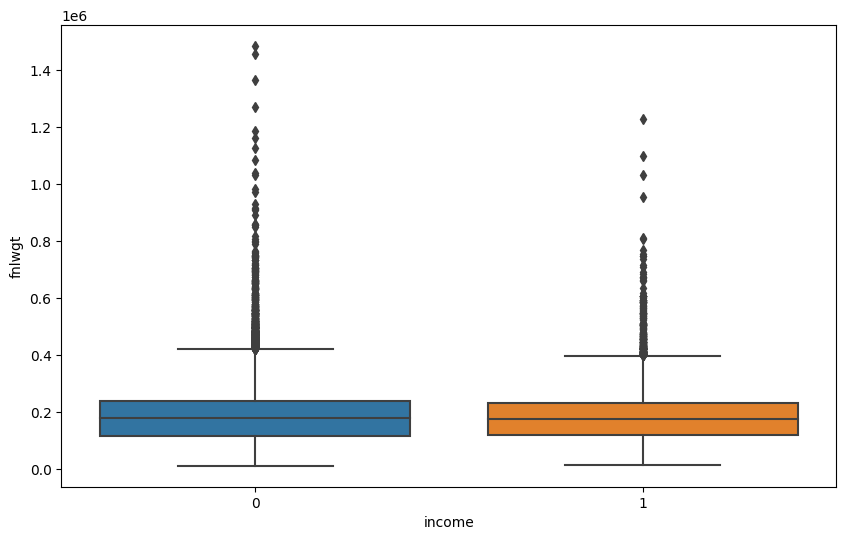

In [67]:
sns.boxplot(data=df,y="fnlwgt",x='income');

## race

In [68]:
df.race.value_counts()

White                 27025
Black                  3068
Asian-Pac-Islander      999
Amer-Indian-Eskimo      303
Other                   264
Name: race, dtype: int64

In [69]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

In [70]:
px.histogram(df, x='race', color="income", barmode='group', title='Income Distribution by Race')

## sex

In [71]:
df.sex.value_counts()

Male      21146
Female    10513
Name: sex, dtype: int64

In [72]:
px.histogram(df, x='sex', color="income", barmode='group', title='Income Distribution by Sex')

## Dropping

In [73]:
df.drop(columns=["fnlwgt","education","education.num","relationship","marital.status","native.country"],inplace=True)

In [74]:
df.head()

age workclass         occupation   race     sex  capital.gain  \
2   66   Private  Machine-op-inspct  Black  Female             0   
3   54   Private  Machine-op-inspct  White  Female             0   
4   41   Private     Prof-specialty  White  Female             0   
5   34   Private      Other-service  White  Female             0   
6   38   Private       Adm-clerical  White    Male             0   

   capital.loss  hours.per.week  income native_country_summary  \
2          4356              40       0                     US   
3          3900              40       0                     US   
4          3900              40       0                     US   
5          3770              45       0                     US   
6          3770              40       0                     US   

  marital_status_summary   education_summary  
2              unmarried  medium_level_grade  
3              unmarried     low_level_grade  
4              unmarried  medium_level_grade  
5              unmarried  medium_level_grade  
6              unmarried     low_level_grade

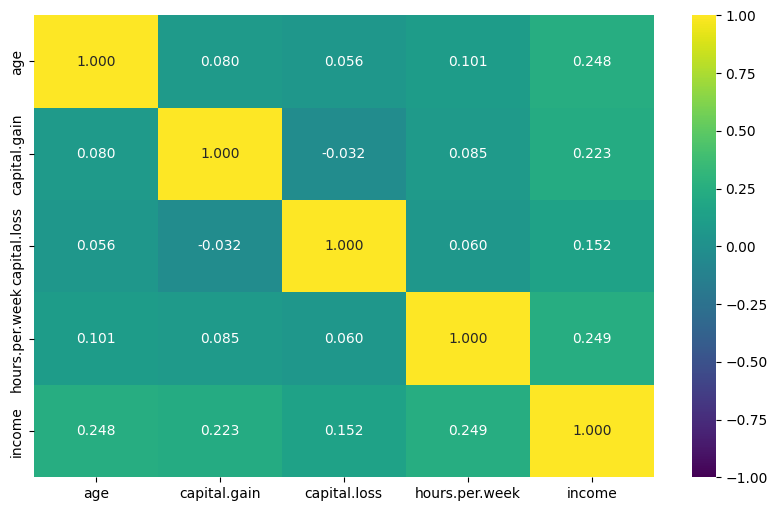

In [75]:
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='viridis');

# Logistic Regression

In [76]:
X= df.drop(columns="income")
y= df.income

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [78]:
categorical = ['workclass', 'marital_status_summary', 'occupation', 'race', 'sex', 'native_country_summary','education_summary']
label_encoder = LabelEncoder()

for feature in categorical:
        X_train[feature] = label_encoder.fit_transform(X_train[feature])
        X_test[feature] = label_encoder.transform(X_test[feature])

In [79]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [80]:
y_pred = log_pipe.predict(X_test)

In [81]:
y_pred_proba = log_pipe.predict_proba(X_test)

In [82]:
pd.DataFrame(y_pred_proba)

0         1
0     0.928375  0.071625
1     0.659161  0.340839
2     0.981473  0.018527
3     0.917350  0.082650
4     0.765177  0.234823
...        ...       ...
9493  0.906674  0.093326
9494  0.057520  0.942480
9495  0.996632  0.003368
9496  0.958086  0.041914
9497  0.559377  0.440623

[9498 rows x 2 columns]

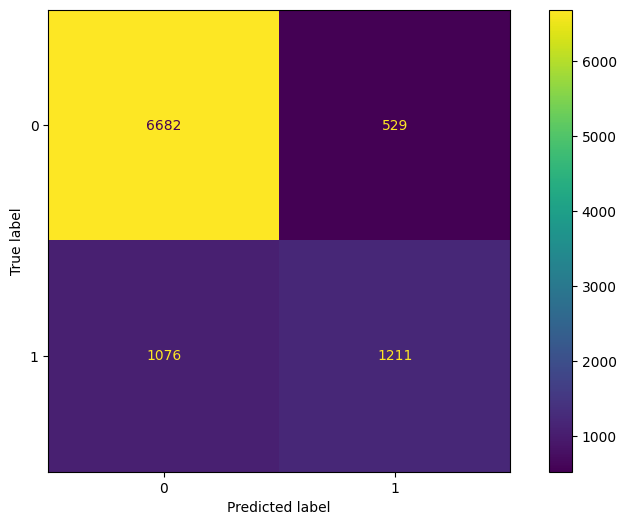

In [83]:
plot_confusion_matrix(log_pipe, X_test, y_test);

In [84]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [85]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[6682  529]
 [1076 1211]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7211
           1       0.70      0.53      0.60      2287

    accuracy                           0.83      9498
   macro avg       0.78      0.73      0.75      9498
weighted avg       0.82      0.83      0.82      9498


Train_Set
[[15685  1141]
 [ 2567  2768]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     16826
           1       0.71      0.52      0.60      5335

    accuracy                           0.83     22161
   macro avg       0.78      0.73      0.75     22161
weighted avg       0.82      0.83      0.82     22161



### GridSearch and Cross Validate

In [86]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1] 
class_weight= ["balanced", None] 


solver = ["lbfgs", "liblinear"] #"sag", "saga"

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) 

grid_model = GridSearchCV(estimator=log_pipe,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   
                          n_jobs = -1,
                          return_train_score=True)

In [87]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall')

In [88]:
grid_model.best_params_

{'logistic__C': 0.01,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [89]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [90]:
grid_model.best_score_

0.8414307397179417

In [91]:
grid_model.best_index_

1

In [92]:
pd.DataFrame(grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.841431
mean_train_score    0.841341
Name: 1, dtype: object

In [93]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

Test_Set
[[5335 1876]
 [ 368 1919]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      7211
           1       0.51      0.84      0.63      2287

    accuracy                           0.76      9498
   macro avg       0.72      0.79      0.73      9498
weighted avg       0.83      0.76      0.78      9498


Train_Set
[[12504  4322]
 [  858  4477]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     16826
           1       0.51      0.84      0.63      5335

    accuracy                           0.77     22161
   macro avg       0.72      0.79      0.73     22161
weighted avg       0.83      0.77      0.78     22161



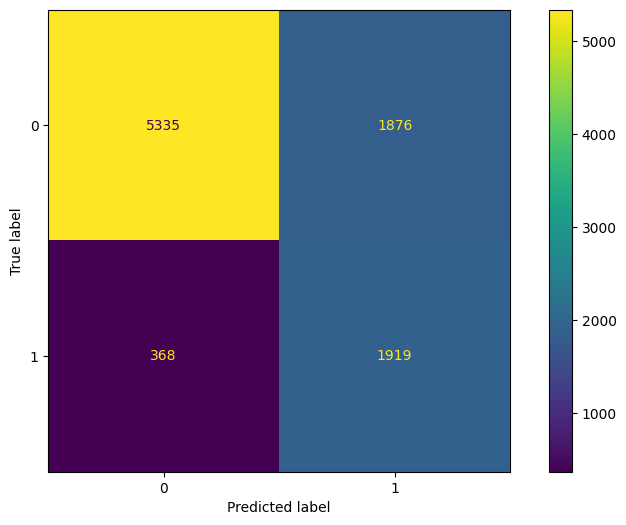

In [94]:
plot_confusion_matrix(grid_model, X_test, y_test)

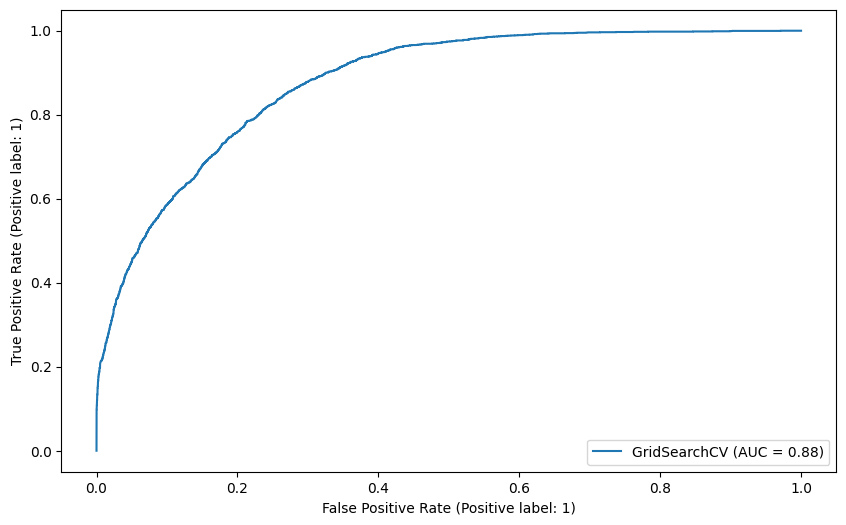

In [95]:
plot_roc_curve(grid_model, X_test, y_test); 

# K-Nearest Neighbors (KNN) Classification

In [96]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

knn_pipe = Pipeline(steps=operations)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [97]:
y_pred = knn_pipe.predict(X_test)

In [98]:
y_pred_proba = knn_pipe.predict_proba(X_test)

In [99]:
pd.DataFrame(y_pred_proba)

0    1
0     1.0  0.0
1     0.6  0.4
2     1.0  0.0
3     1.0  0.0
4     0.8  0.2
...   ...  ...
9493  0.8  0.2
9494  0.2  0.8
9495  1.0  0.0
9496  1.0  0.0
9497  1.0  0.0

[9498 rows x 2 columns]

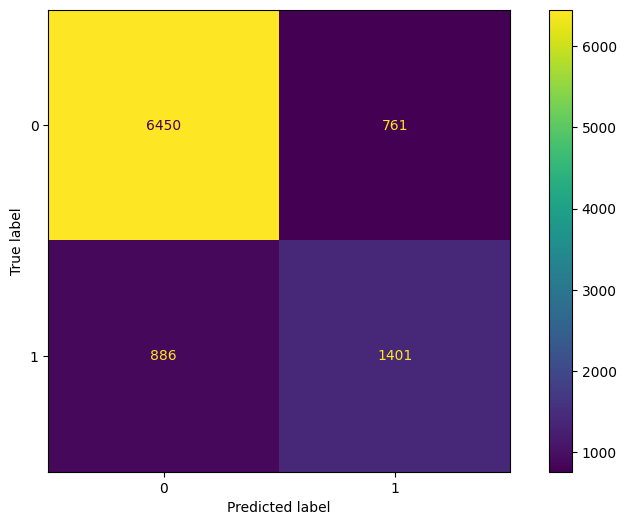

In [100]:
plot_confusion_matrix(knn_pipe, X_test, y_test);

In [101]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[6450  761]
 [ 886 1401]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7211
           1       0.65      0.61      0.63      2287

    accuracy                           0.83      9498
   macro avg       0.76      0.75      0.76      9498
weighted avg       0.82      0.83      0.82      9498


Train_Set
[[15778  1048]
 [ 1681  3654]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16826
           1       0.78      0.68      0.73      5335

    accuracy                           0.88     22161
   macro avg       0.84      0.81      0.82     22161
weighted avg       0.87      0.88      0.87     22161



In [102]:
test_error_rates = []


for k in range(1,10):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 5)
    
    recall_mean = scores["test_recall"].mean() 
    
    test_error = 1 - recall_mean
    
    test_error_rates.append(test_error)

In [103]:
test_error_rates

[0.4101218369259605,
 0.5754451733833177,
 0.4101218369259606,
 0.5212746016869728,
 0.41630740393626986,
 0.49165885660731024,
 0.41574507966260543,
 0.47516401124648555,
 0.41330834114339265]

In [105]:
test_error_rates = []
train_error_rates = []

for k in range(1,10):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 5, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 

    
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

In [106]:
train_error_rates

[0.07530459231490172,
 0.42174320524835995,
 0.25571696344892225,
 0.4141049671977507,
 0.3144798500468603,
 0.4160262417994376,
 0.3470009372071228,
 0.4186504217432052,
 0.36026241799437675]

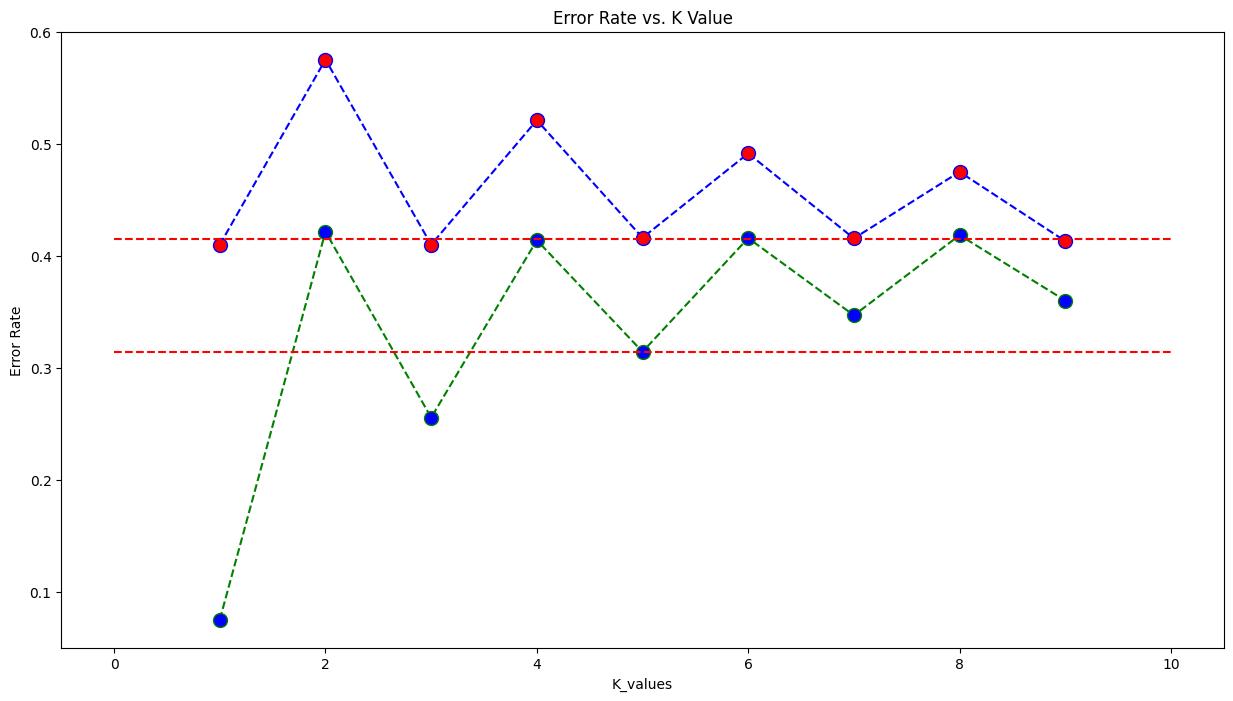

In [107]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.415, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.314, xmin = 0, xmax = 10, colors= 'r', linestyles="--");

In [108]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))]
knn3 = Pipeline(steps=operations)

knn3.fit(X_train, y_train)
print('WITH K=3\n')
eval_metric(knn3, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[6371  840]
 [ 888 1399]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7211
           1       0.62      0.61      0.62      2287

    accuracy                           0.82      9498
   macro avg       0.75      0.75      0.75      9498
weighted avg       0.82      0.82      0.82      9498


Train_Set
[[15879   947]
 [ 1350  3985]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     16826
           1       0.81      0.75      0.78      5335

    accuracy                           0.90     22161
   macro avg       0.86      0.85      0.85     22161
weighted avg       0.89      0.90      0.89     22161



In [109]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
knn5 = Pipeline(steps=operations)

knn5.fit(X_train, y_train)
print('WITH K=5\n')
eval_metric(knn5, X_train, y_train, X_test, y_test)

WITH K=5

Test_Set
[[6450  761]
 [ 886 1401]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7211
           1       0.65      0.61      0.63      2287

    accuracy                           0.83      9498
   macro avg       0.76      0.75      0.76      9498
weighted avg       0.82      0.83      0.82      9498


Train_Set
[[15778  1048]
 [ 1681  3654]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16826
           1       0.78      0.68      0.73      5335

    accuracy                           0.88     22161
   macro avg       0.84      0.81      0.82     22161
weighted avg       0.87      0.88      0.87     22161



In [110]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))]
knn7 = Pipeline(steps=operations)

knn7.fit(X_train, y_train)
print('WITH K=7\n')
eval_metric(knn7, X_train, y_train, X_test, y_test)

WITH K=7

Test_Set
[[6506  705]
 [ 881 1406]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7211
           1       0.67      0.61      0.64      2287

    accuracy                           0.83      9498
   macro avg       0.77      0.76      0.77      9498
weighted avg       0.83      0.83      0.83      9498


Train_Set
[[15775  1051]
 [ 1844  3491]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16826
           1       0.77      0.65      0.71      5335

    accuracy                           0.87     22161
   macro avg       0.83      0.80      0.81     22161
weighted avg       0.86      0.87      0.87     22161



## Cross Validate

In [111]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1   0.088201    0.396246       0.841678        0.867680        0.701099   
2   0.078363    0.406045       0.845668        0.867636        0.706263   
3   0.078130    0.411638       0.855144        0.866834        0.735556   
4   0.078130    0.396329       0.830325        0.869792        0.665962   
5   0.078363    0.411443       0.844314        0.870444        0.703463   
6   0.078130    0.406278       0.845668        0.869792        0.716553   
7   0.062505    0.421903       0.827166        0.870644        0.673563   
8   0.078130    0.422128       0.824007        0.869992        0.663636   
9   0.062504    0.411830       0.838899        0.869291        0.691145   
10  0.078130    0.390652       0.826715        0.870143        0.668919   

    train_precision  test_recall  train_recall   test_f1  train_f1  
1          0.760608     0.597378      0.657155  0.645096  0.705107  
2          0.765472     0.613508      0.649105  0.656627  0.702502  
3          0.762604     0.621013      0.648896  0.673449  0.701170  
4          0.766369     0.590994      0.660558  0.626243  0.709540  
5          0.769567     0.609756      0.659309  0.653266  0.710184  
6          0.770552     0.592871      0.653894  0.648871  0.707446  
7          0.770392     0.548689      0.659029  0.604747  0.710373  
8          0.764875     0.546816      0.664028  0.599589  0.710893  
9          0.769269     0.599251      0.652781  0.641926  0.706254  
10         0.771422     0.556180      0.654447  0.607362  0.708136

In [112]:
df_scores.mean()[2:]

test_accuracy      0.837958
train_accuracy     0.869225
test_precision     0.692616
train_precision    0.767113
test_recall        0.587646
train_recall       0.655920
test_f1            0.635717
train_f1           0.707160
dtype: float64

## GridSearch

In [113]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [114]:
k_values= range(1,10)

In [115]:
param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

In [116]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring = "recall", return_train_score=True, n_jobs=-1)

In [117]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 10), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall')

In [118]:
knn_grid_model.best_params_

{'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}

In [119]:
knn_grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(p=1))])

In [120]:
knn_grid_model.best_index_

16

In [121]:
pd.DataFrame(knn_grid_model.cv_results_).loc[32, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.591766
mean_train_score    0.647631
Name: 32, dtype: object

In [122]:
knn_grid_model.best_score_

0.6013249151506208

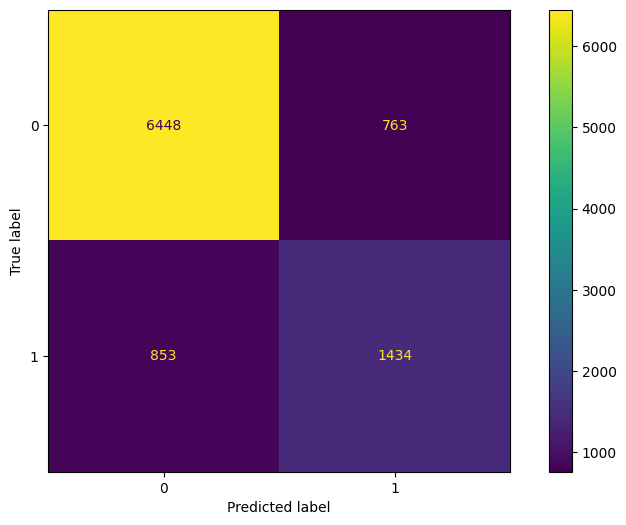

In [123]:
plot_confusion_matrix(knn_grid_model, X_test, y_test);

In [124]:
print('WITH K=5\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=5

Test_Set
[[6448  763]
 [ 853 1434]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7211
           1       0.65      0.63      0.64      2287

    accuracy                           0.83      9498
   macro avg       0.77      0.76      0.76      9498
weighted avg       0.83      0.83      0.83      9498


Train_Set
[[15796  1030]
 [ 1665  3670]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     16826
           1       0.78      0.69      0.73      5335

    accuracy                           0.88     22161
   macro avg       0.84      0.81      0.83     22161
weighted avg       0.87      0.88      0.88     22161



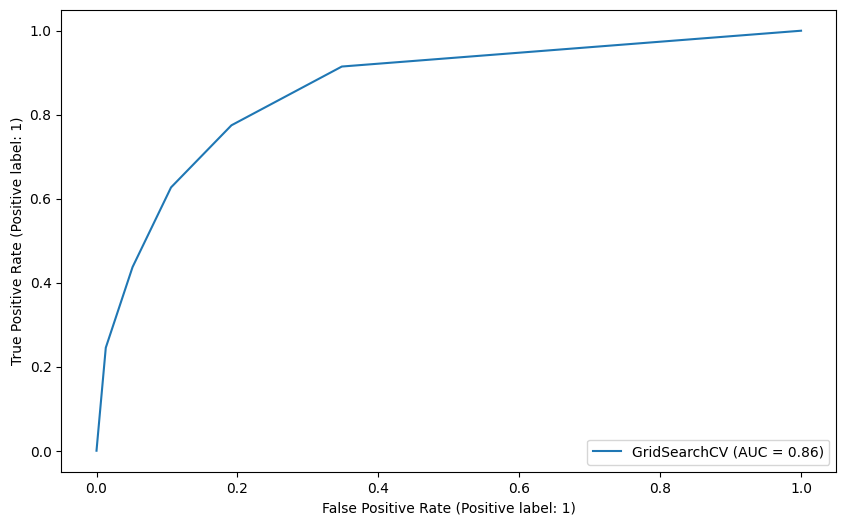

In [125]:
plot_roc_curve(knn_grid_model, X_test, y_test);

In [126]:
y_pred_proba = knn_grid_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8601047493575046

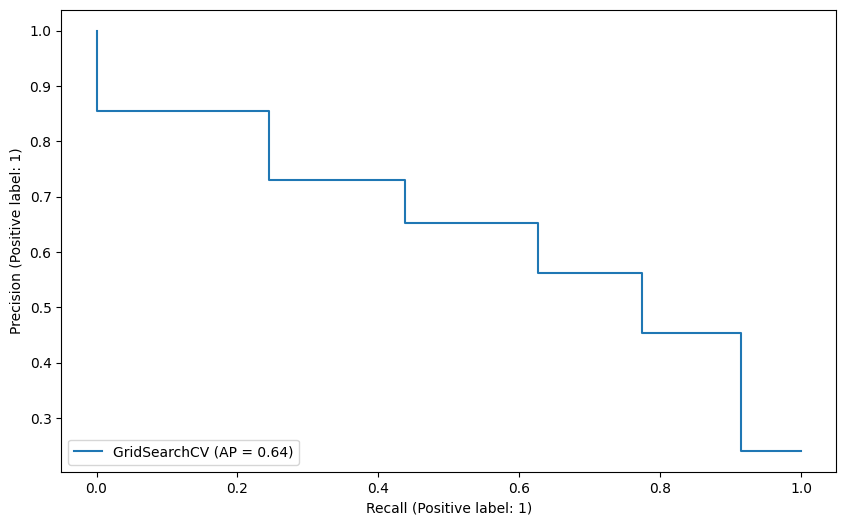

In [127]:
plot_precision_recall_curve(knn_grid_model, X_test, y_test);

# Decision Tree Classification

In [128]:
dt_model = DecisionTreeClassifier(random_state=101)

In [129]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [130]:
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)

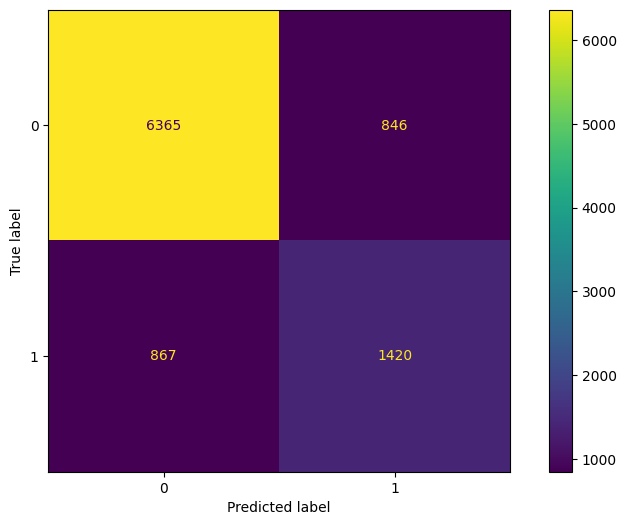

In [131]:
plot_confusion_matrix(dt_model,X_test,y_test);

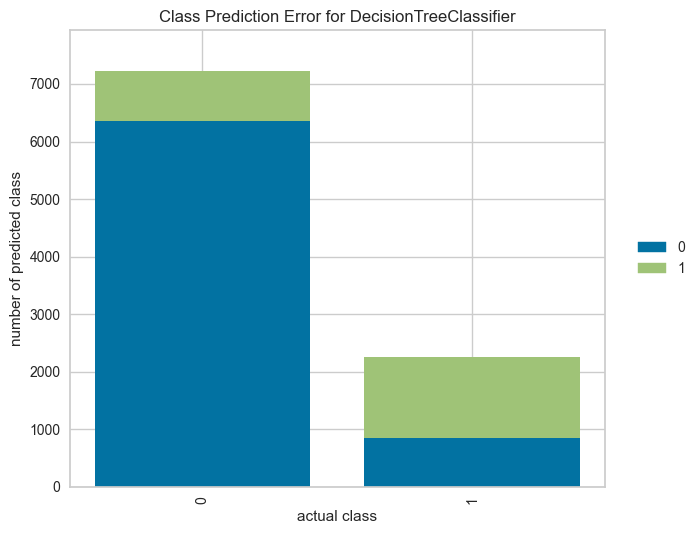

In [132]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [133]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[6365  846]
 [ 867 1420]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7211
           1       0.63      0.62      0.62      2287

    accuracy                           0.82      9498
   macro avg       0.75      0.75      0.75      9498
weighted avg       0.82      0.82      0.82      9498


Train_Set
[[16680   146]
 [  659  4676]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16826
           1       0.97      0.88      0.92      5335

    accuracy                           0.96     22161
   macro avg       0.97      0.93      0.95     22161
weighted avg       0.96      0.96      0.96     22161



In [134]:
scores = cross_validate(dt_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision_micro  \
1   0.049394    0.015893       0.820478        0.964751              0.820478   
2   0.049026    0.016104       0.829422        0.964853              0.829422   
3   0.050011    0.008644       0.827166        0.964753              0.827166   
4   0.049193    0.012489       0.813628        0.965706              0.813628   
5   0.045449    0.000000       0.815884        0.965405              0.815884   
6   0.049907    0.000000       0.808213        0.966007              0.808213   
7   0.048906    0.000000       0.814079        0.965505              0.814079   
8   0.049887    0.000000       0.809116        0.965956              0.809116   
9   0.046652    0.015625       0.827617        0.965405              0.827617   
10  0.046879    0.000000       0.822653        0.965305              0.822653   

    train_precision_micro  test_recall_micro  train_recall_micro  \
1                0.964751           0.820478            0.964751   
2                0.964853           0.829422            0.964853   
3                0.964753           0.827166            0.964753   
4                0.965706           0.813628            0.965706   
5                0.965405           0.815884            0.965405   
6                0.966007           0.808213            0.966007   
7                0.965505           0.814079            0.965505   
8                0.965956           0.809116            0.965956   
9                0.965405           0.827617            0.965405   
10               0.965305           0.822653            0.965305   

    test_f1_micro  train_f1_micro  
1        0.820478        0.964751  
2        0.829422        0.964853  
3        0.827166        0.964753  
4        0.813628        0.965706  
5        0.815884        0.965405  
6        0.808213        0.966007  
7        0.814079        0.965505  
8        0.809116        0.965956  
9        0.827617        0.965405  
10       0.822653        0.965305

In [135]:
df_scores.mean()[2:]

test_accuracy            0.818826
train_accuracy           0.965365
test_precision_micro     0.818826
train_precision_micro    0.965365
test_recall_micro        0.818826
train_recall_micro       0.965365
test_f1_micro            0.818826
train_f1_micro           0.965365
dtype: float64

In [136]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(eval_metric(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, fontsize=10);

In [137]:
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=101)



Test_Set
[[6813  398]
 [1078 1209]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7211
           1       0.75      0.53      0.62      2287

    accuracy                           0.84      9498
   macro avg       0.81      0.74      0.76      9498
weighted avg       0.84      0.84      0.83      9498


Train_Set
[[15943   883]
 [ 2600  2735]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16826
           1       0.76      0.51      0.61      5335

    accuracy                           0.84     22161
   macro avg       0.81      0.73      0.76     22161
weighted avg       0.83      0.84      0.83     22161

None




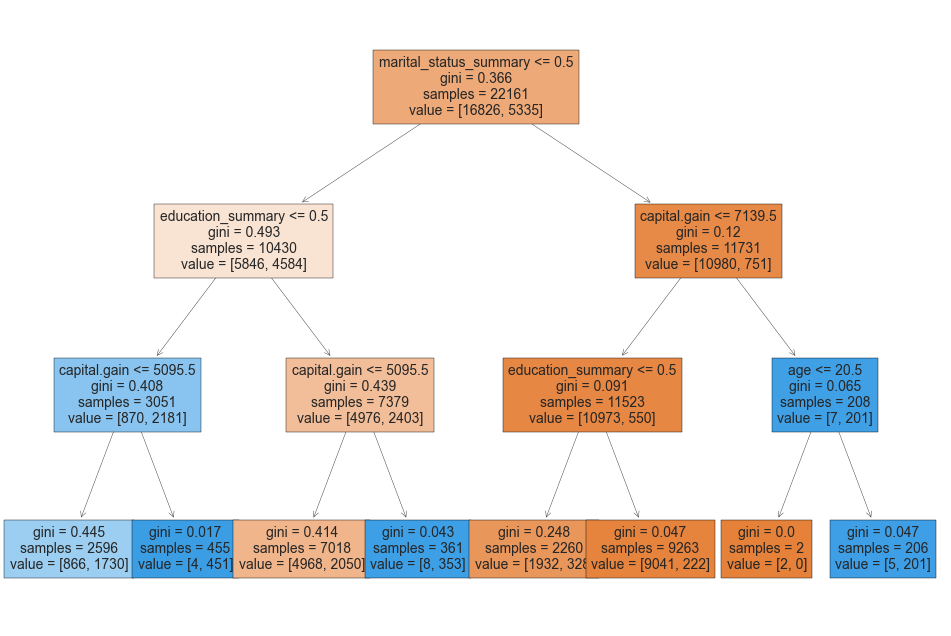

In [138]:
from sklearn.tree import plot_tree

report_model(pruned_tree)
plt.show()

## GridSearch and Cross Validate

In [139]:
dt_model = DecisionTreeClassifier()

In [140]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto"],
              "max_depth": [None, 2, 3],
              "min_samples_leaf": [3,4,5],
              "min_samples_split": [3,5,6],
              'class_weight': [None, "balanced"]}

In [141]:
grid_model = GridSearchCV(estimator=dt_model,
                          param_grid=param_grid,
                          scoring='recall',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [142]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 2, 3],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 5, 6],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='recall')

In [143]:
grid_model.best_index_

144

In [144]:
pd.DataFrame(grid_model.cv_results_).loc[153, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.865423
mean_train_score    0.863834
Name: 153, dtype: object

In [145]:
grid_model.best_score_

0.901222322940602

In [146]:
grid_model.best_params_

{'class_weight': 'balanced',
 'max_depth': 2,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [147]:
grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=3,
                       min_samples_split=3)

In [148]:
model_dt = DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [149]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [150]:
y_pred = model_dt.predict(X_test)
y_train_pred = model_dt.predict(X_train)

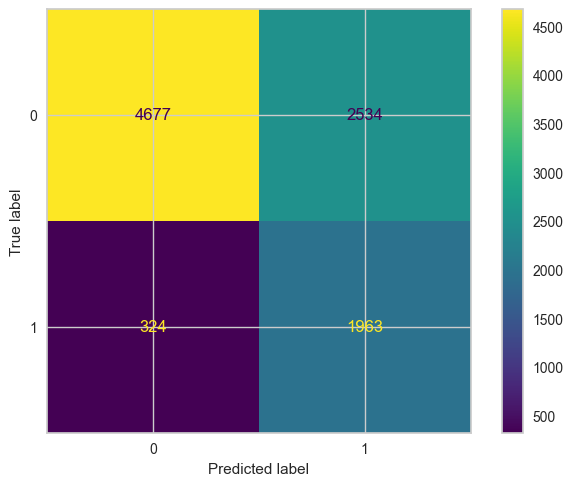

In [151]:
plot_confusion_matrix(model_dt,X_test,y_test);



Test_Set
[[4677 2534]
 [ 324 1963]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      7211
           1       0.44      0.86      0.58      2287

    accuracy                           0.70      9498
   macro avg       0.69      0.75      0.67      9498
weighted avg       0.82      0.70      0.72      9498


Train_Set
[[10980  5846]
 [  751  4584]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     16826
           1       0.44      0.86      0.58      5335

    accuracy                           0.70     22161
   macro avg       0.69      0.76      0.68     22161
weighted avg       0.82      0.70      0.72     22161

None




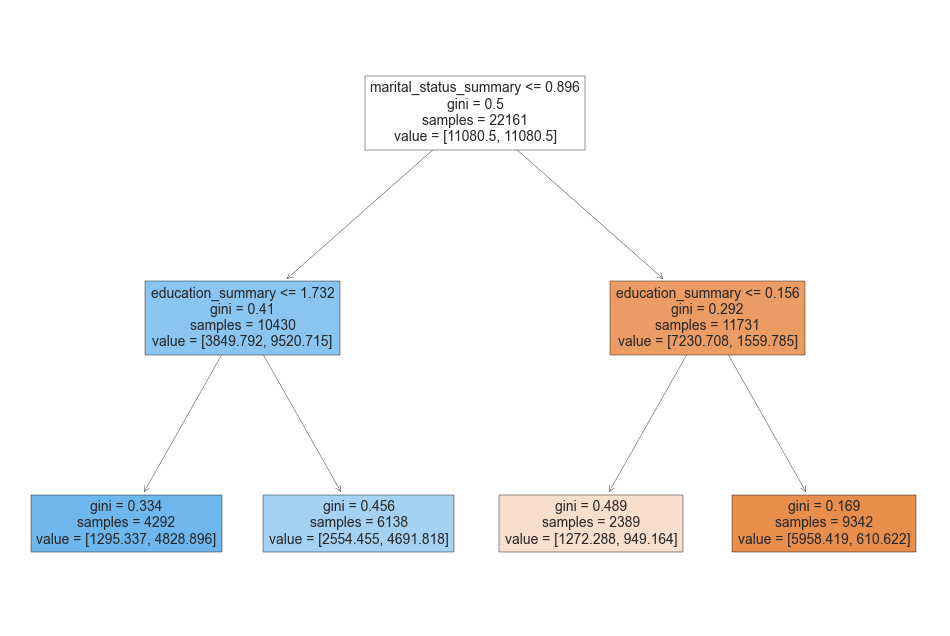

In [152]:
report_model(model_dt)
plt.show()

In [153]:
eval_metric(model_dt, X_train, y_train, X_test, y_test)

Test_Set
[[4677 2534]
 [ 324 1963]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      7211
           1       0.44      0.86      0.58      2287

    accuracy                           0.70      9498
   macro avg       0.69      0.75      0.67      9498
weighted avg       0.82      0.70      0.72      9498


Train_Set
[[10980  5846]
 [  751  4584]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     16826
           1       0.44      0.86      0.58      5335

    accuracy                           0.70     22161
   macro avg       0.69      0.76      0.68     22161
weighted avg       0.82      0.70      0.72     22161



### Logistic Model 
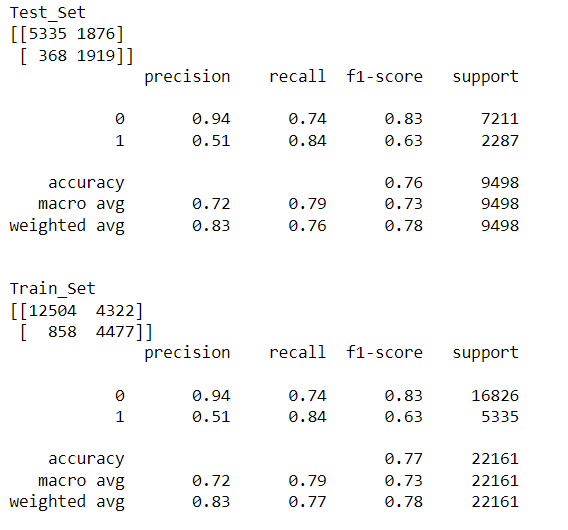

### KNN Model 
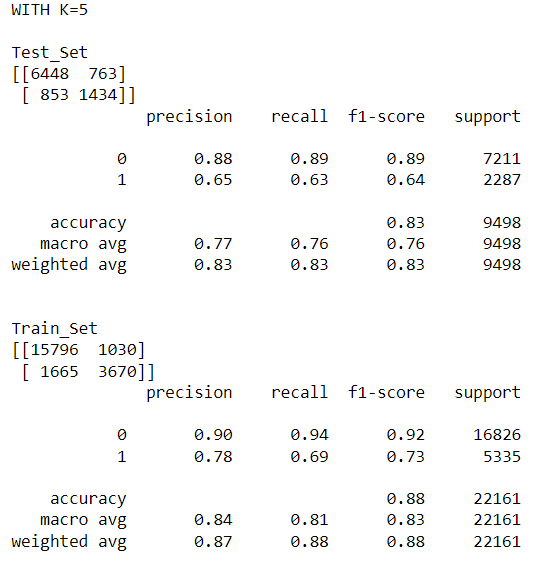

# Final Model and Predict

Datamizin unbalance olmasindan dolayi recall ve f1-score degerlerini dikkate aliyorum ve bunun yaninda degerlerin birbiri ile uyumuna bakarak hatalarin da daha az olmasini goz onunde bulundurarak final modelimi KNN olarak belirledim.

In [154]:
X= df.drop(columns="income")
y= df.income

In [157]:
categorical = ['workclass', 'marital_status_summary', 'occupation', 'race', 'sex', 'native_country_summary','education_summary']
label_encoder = LabelEncoder()

for feature in categorical:
        X[feature] = label_encoder.fit_transform(X[feature])
        y = label_encoder.fit_transform(y)

In [158]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5, p=1))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(p=1))])